In [53]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [85]:
site_1 = "https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats"
site_2 = "https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats"

page_1 = pd.read_html(site_1)
frame_1 = page_1[0]
frame_1.columns = frame_1.columns.droplevel(0)
frame_1 = frame_1[['Player', 'Nation', 'Pos', 'Squad', 'Comp', '90s', 'SCA', 'SCA90']]

page_2 = pd.read_html(site_2)
frame_2 = page_2[0]
frame_2.columns = frame_2.columns.droplevel(0)
frame_2 = frame_2[['Player', 'Sh', 'Gls', 'SoT']]

In [86]:
df = pd.concat([frame_1, frame_2], axis=1)

In [87]:
df = df.loc[:,~df.columns.duplicated()].copy()

df = df.dropna()
df = df[df['Gls'] != 'Gls']

df['SCA'] = df['SCA'].astype(int)
df['SCA90'] = df['SCA90'].astype(float)
df['Sh'] = df['Sh'].astype(int)
df['90s'] = df['90s'].astype(float)

df['Sh90'] = round(df['Sh'] / df['90s'], 2)

df = df.loc[df['90s'] > df['90s'].mean()]
df = df.loc[df['SCA90'] > 3]
df = df.reset_index()

df = df.sort_values(by=['SCA90'])
df

,index,Player,Nation,Pos,Squad,Comp,90s,SCA,SCA90,Sh,Gls,SoT,Sh90
17,201,Alessandro Bastoni,it ITA,DF,Inter,it Serie A,7.3,22,3.01,4,0,2,0.55
121,1180,Silas Katompa,cd COD,"FW,DF",Stuttgart,de Bundesliga,11.6,35,3.02,21,3,7,1.81
151,1450,Aarón Martín,es ESP,DF,Mainz 05,de Bundesliga,12.9,39,3.03,11,3,4,0.85
98,981,Janik Haberer,de GER,MF,Union Berlin,de Bundesliga,8.6,26,3.04,16,3,7,1.86
107,1061,Pierre Højbjerg,dk DEN,MF,Tottenham,eng Premier League,12.8,39,3.04,15,3,6,1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,355,Rémy Cabella,fr FRA,"MF,FW",Lille,fr Ligue 1,7.1,46,6.52,10,3,9,1.41
196,1830,Matteo Politano,it ITA,FW,Napoli,it Serie A,6.4,42,6.56,17,3,3,2.66
47,570,Kevin De Bruyne,be BEL,MF,Manchester City,eng Premier League,11.6,77,6.66,32,3,11,2.76
160,1523,Lionel Messi,ar ARG,"MF,FW",Paris S-G,fr Ligue 1,11.7,79,6.75,54,7,29,4.62


Text(0, 0.5, 'Shots / per 90')

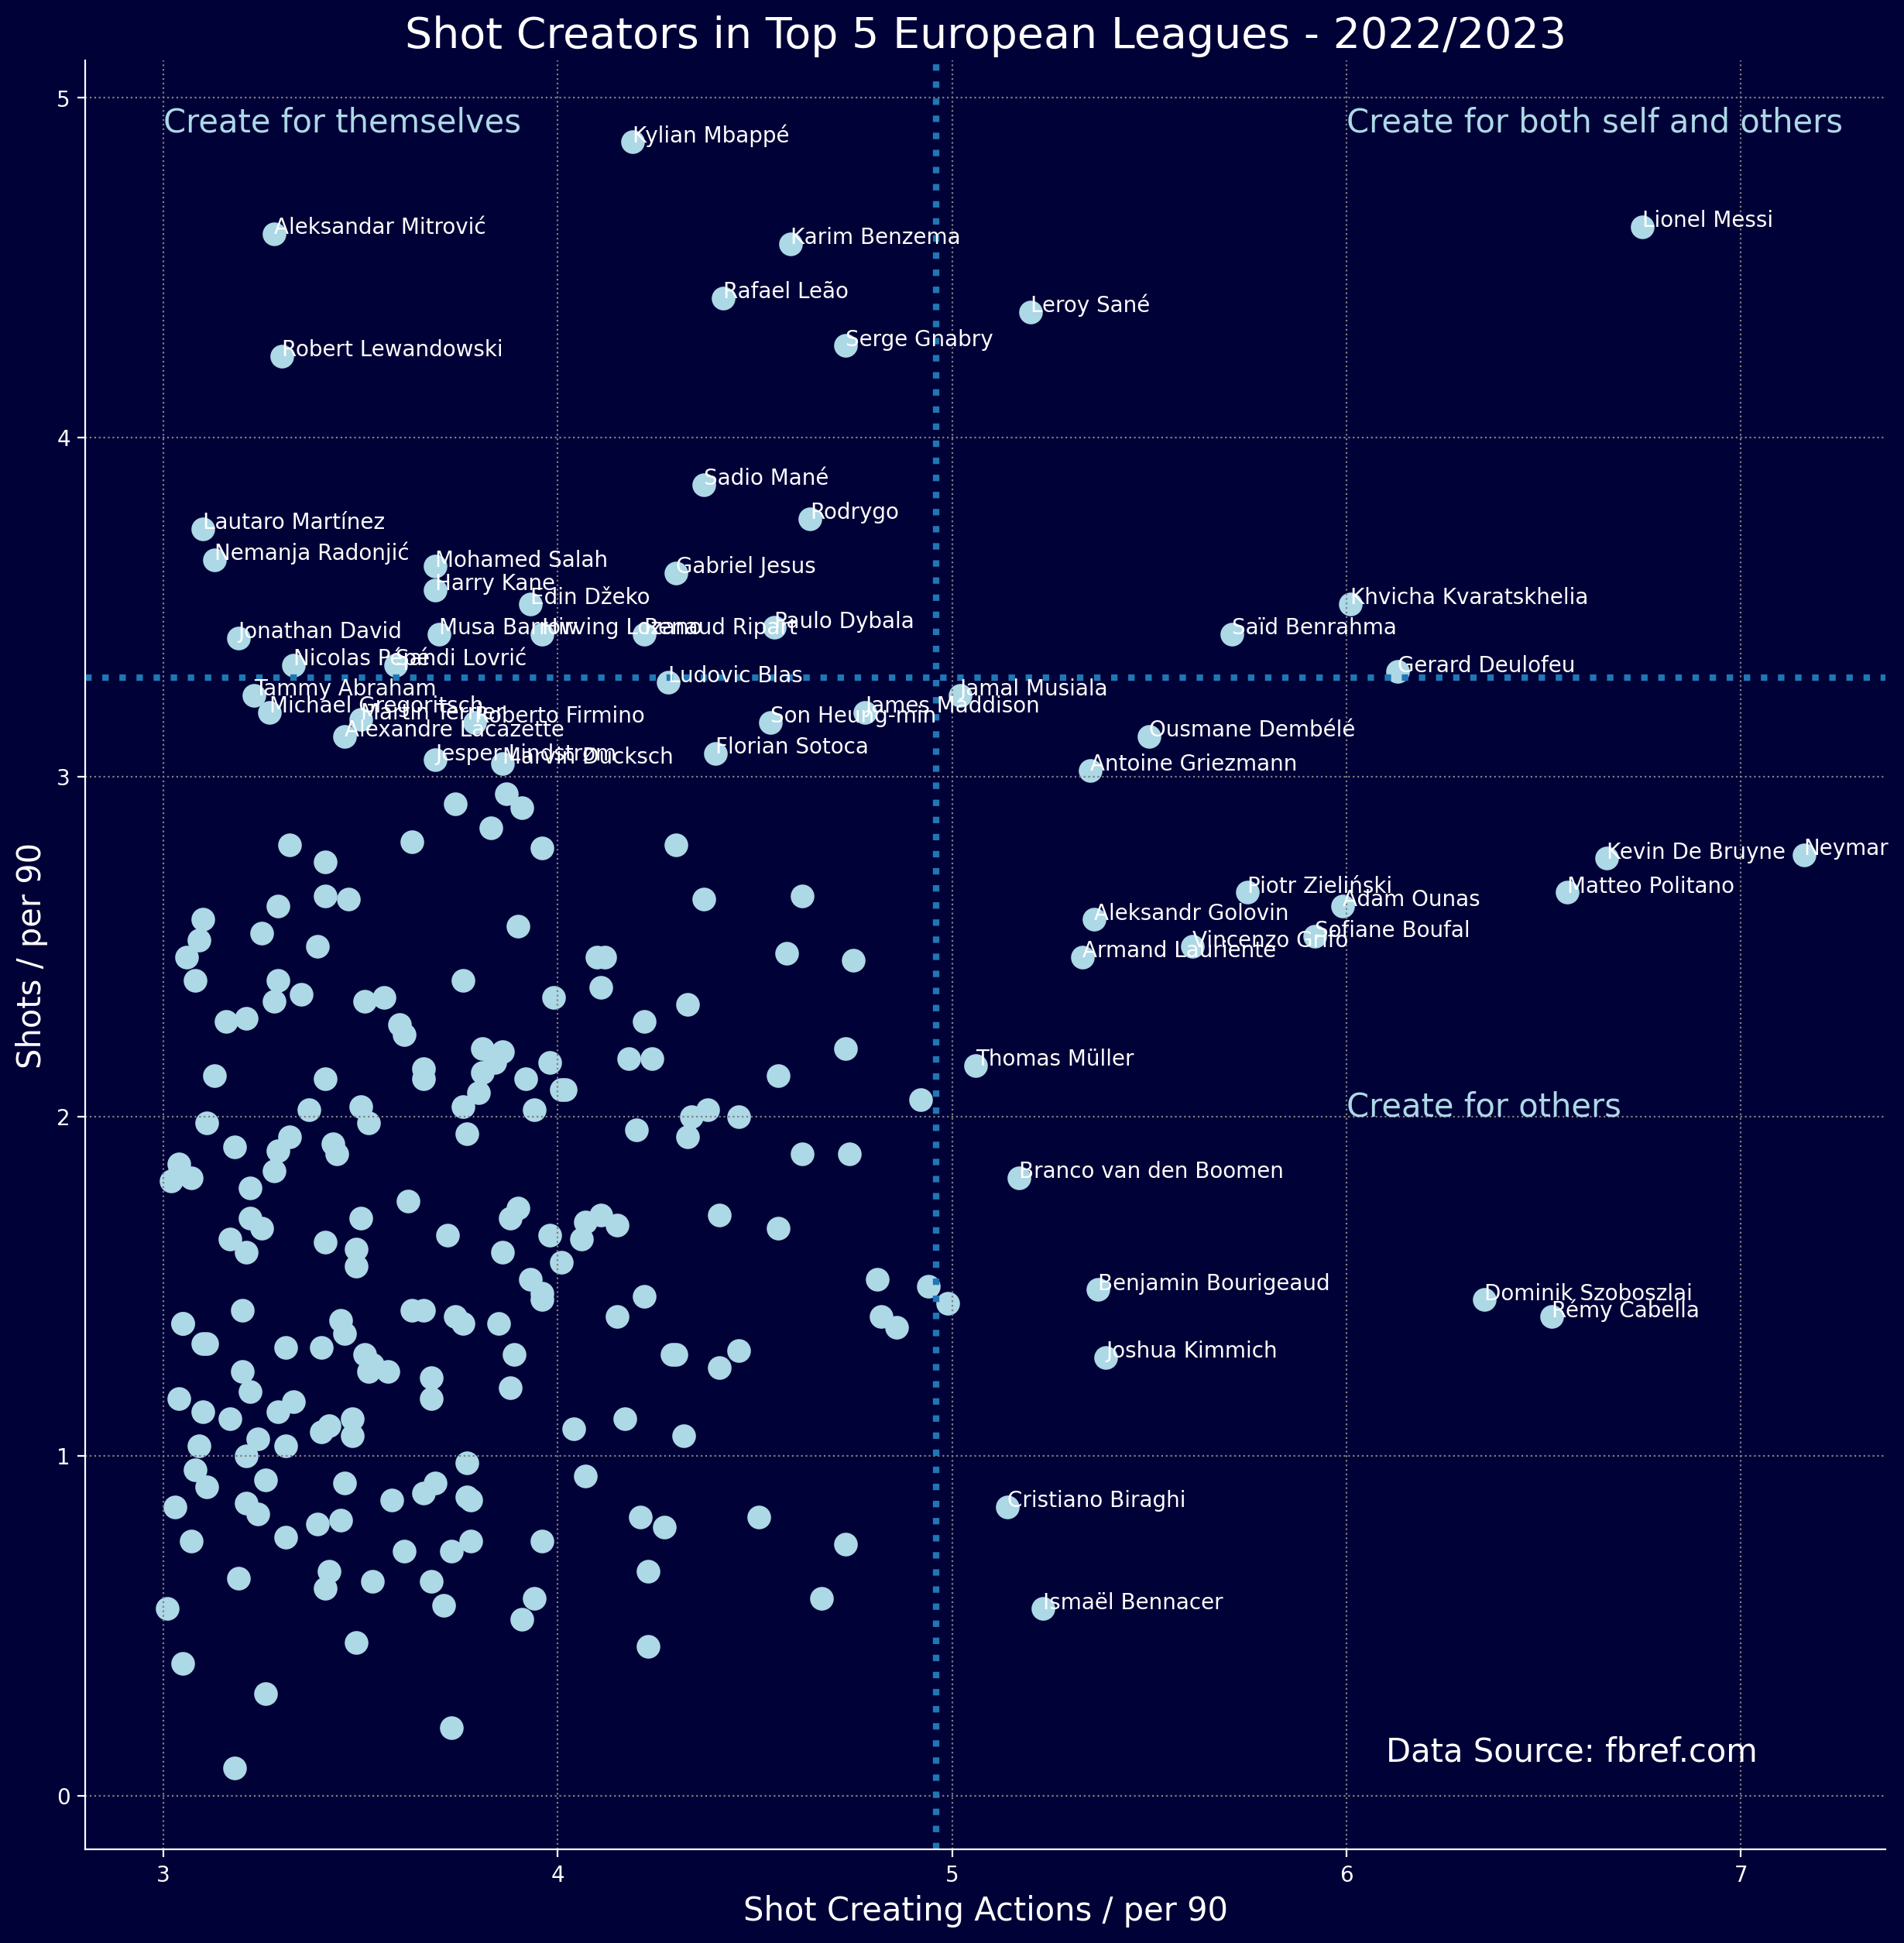

In [135]:
plt.figure(figsize = (15,15), dpi = 200, facecolor = '#000137')

ax = plt.axes()
ax.set_facecolor("#000137")

ax.grid(True, c = "grey", ls = ":")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("white")
ax.spines['left'].set_color("white")
ax.tick_params(colors="white")
ax.xaxis.label.set_color("white")

plt.scatter(df['SCA90'], df['Sh90'], s=100, c="lightblue")

for i in range(0, len(df)):
    if df['Sh90'][i] > 3:
        plt.text(df['SCA90'][i], df['Sh90'][i], s = df['Player'][i], color="white")
    elif df['SCA90'][i] > 5:
        plt.text(df['SCA90'][i], df['Sh90'][i], s = df['Player'][i], color="white")
        
plt.title("Shot Creators in Top 5 European Leagues - 2022/2023", fontsize = 20, color="white")

plt.axvline(df['SCA90'].quantile(0.90), linewidth = 3, ls = ":")
plt.axhline(df['Sh90'].quantile(0.90), linewidth = 3, ls = ":")

plt.text(6, 2, "Create for others", c="lightblue", fontsize=15)
plt.text(3, 4.9, "Create for themselves", c="lightblue", fontsize=15)
plt.text(6, 4.9, "Create for both self and others", c="lightblue", fontsize=15)


plt.text(6.1, 0.1, "Data Source: fbref.com", fontsize = 15, color="white")
    
plt.xlabel("Shot Creating Actions / per 90", fontsize = 15, color="white")
plt.ylabel("Shots / per 90", fontsize = 15, color="white")